# Python Exercises for Petroleum Engineers: Set 2
### <font color='red'>Novin Nekuee</font>
#### Student_id: <font color='red'>403134029</font>

Welcome to the second homework for your "Introduction to Machine Learning" course. In this assignment, you will be working with a real well-logging dataset. Your task is to build a machine learning model that can predict water saturation using the appropriate set of logs.

In this homework, you will have the opportunity to solve a realistic machine learning problem step by step. To begin, you will need to import your well-logging data into Python and use appropriate tools to describe the data. You will then perform several preprocessing steps, such as 
> 1. data cleaning, 

> 2. normalization, 

> 3. exploratory data analysis,

> 4. and feature selection,

to ensure that the data is ready to be used in a machine learning model.

Next, you should design an ANN model using Keras or Pytorch Lightning libraries. You will then train the neural network with different configurations, including varying the number of layers, number of neurons, learning rates, activation functions, and number of epochs.

During training,  you will analyze the loss versus iteration curves to determine the best configuration for your model. You will also need to identify cases of overfitting and underfitting, which can negatively impact the performance of your model. Through this process, you will gain valuable experience in designing and training neural networks, and learn how to optimize their performance for a specific problem.

This homework will provide you with a hands-on experience in solving a realistic machine learning problem and help you develop important skills in data preprocessing, neural network training, and performance analysis. By completing this assignment, you will be well-prepared to tackle more complex machine learning problems in your future career as a petroleum engineer.

So, let's get started and dive into the exercises!

#### Task 1: Data Import

You have been provided with a well logging data set *FullSet_HW2.las*. This file is an *ASCII* file, which means you can load it by notepad to see what does it contain. Contact me if you had problem with understanding the data file.

Find a way to import this file into Python.

In [1]:
# First of all lets read las file and save it as excel file
import lasio
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

las = lasio.read("./FullSet_HW2.las")

df = las.df()
df = df.reset_index()
df.head()

# df.to_excel("FullSet_HW2.xlsx", engine='openpyxl')   # For save it to excel

DEPTH  CALIPER  DRHO  DT  DTS       GR  MSFR  NPHI  PEF  POTA  RHOB  RLLD  \
0  27.000      NaN   NaN NaN  NaN  13.4222   NaN   NaN  NaN   NaN   NaN   NaN   
1  27.125      NaN   NaN NaN  NaN  14.2646   NaN   NaN  NaN   NaN   NaN   NaN   
2  27.250      NaN   NaN NaN  NaN  14.7782   NaN   NaN  NaN   NaN   NaN   NaN   
3  27.375      NaN   NaN NaN  NaN  14.8532   NaN   NaN  NaN   NaN   NaN   NaN   
4  27.500      NaN   NaN NaN  NaN  14.5207   NaN   NaN  NaN   NaN   NaN   NaN   

   RLLS  SWE  THOR  URAN  
0   NaN  NaN   NaN   NaN  
1   NaN  NaN   NaN   NaN  
2   NaN  NaN   NaN   NaN  
3   NaN  NaN   NaN   NaN  
4   NaN  NaN   NaN   NaN

In [2]:
print(las.curves)  # For more information about the data set

Mnemonic  Unit  Value  Description                         
--------  ----  -----  -----------                         
DEPTH     M            {F}                                 
CALIPER   MM           Caliper    {F}                      
DRHO      K/M3         Delta rho    {F}                    
DT        US/M         Delta Time    {F}                   
DTS       US/M         Shear Interval Transit Time    {F}  
GR        GAPI         Gamma Ray    {F}                    
MSFR                   {F}                                 
NPHI      V/V          Neutron porosity    {F}             
PEF       B/E          Photo-electric factor    {F}        
POTA      %            Potassium    {F}                    
RHOB      K/M3         Bulk Density    {F}                 
RLLD                   {F}                                 
RLLS                   {F}                                 
SWE       V/V          Effective Water Saturation    {F}   
THOR      PPM          Thorium    {F}   

#### Task 2: Data Description

Describe the provided dataset. Your description should contain 
1. shape of the dataset, 
2. number of nulls of each column, 
3. descriptive statistics (similar to Figure 3-3 "Machine Learning in the
Oil and Gas Industry"), 
4. and your suggested depth interval to develope the model. 

Task2-1: Shape of the dataset

In [3]:
df.shape

(25899, 16)

Task2-2: number of null values in each column

There is two ways to solve this problem, one is to use the `isnull()` function to count the number of null values in each column, and the other ways is to get the count of Non-Null values by getting data information (`info()`)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25899 entries, 0 to 25898
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH    25899 non-null  float64
 1   CALIPER  25458 non-null  float64
 2   DRHO     7742 non-null   float64
 3   DT       25173 non-null  float64
 4   DTS      3688 non-null   float64
 5   GR       25752 non-null  float64
 6   MSFR     5827 non-null   float64
 7   NPHI     8244 non-null   float64
 8   PEF      7742 non-null   float64
 9   POTA     8110 non-null   float64
 10  RHOB     7742 non-null   float64
 11  RLLD     8007 non-null   float64
 12  RLLS     8015 non-null   float64
 13  SWE      1729 non-null   float64
 14  THOR     8110 non-null   float64
 15  URAN     8110 non-null   float64
dtypes: float64(16)
memory usage: 3.2 MB


In [5]:
df.isnull().sum()

DEPTH          0
CALIPER      441
DRHO       18157
DT           726
DTS        22211
GR           147
MSFR       20072
NPHI       17655
PEF        18157
POTA       17789
RHOB       18157
RLLD       17892
RLLS       17884
SWE        24170
THOR       17789
URAN       17789
dtype: int64

Task2-3: Descriptive Statistics

In this step, we generate a descriptive statistical summary of the dataset using the `describe()` method. This provides key metrics for each well log, such as the `count`, `mean`, `standard deviation`, `minimum`, `maximum`, and `quartile values`.

In [6]:
df.describe().transpose()  # I used transpose due to the width limitation of final pdf file

count         mean          std        min         25%  \
DEPTH    25899.0  1645.625000   934.567706  27.000000  836.312500   
CALIPER  25458.0    14.212401     4.640448   7.693300    9.034050   
DRHO      7742.0     0.079707     0.145116  -1.313353    0.024000   
DT       25173.0    90.548042    26.977269  37.998200   67.309000   
DTS       3688.0   127.695462    18.901311  78.234800  117.553275   
GR       25752.0    31.114276    12.340763   4.701200   23.512075   
MSFR      5827.0     3.041833     3.738093   0.293000    1.367500   
NPHI      8244.0     0.195071     0.104171  -0.002580    0.123149   
PEF       7742.0     6.721218     6.441028   1.952300    3.597025   
POTA      8110.0     0.746082     0.345081   0.012600    0.520250   
RHOB      7742.0     2.524475     0.192477   1.221000    2.465000   
RLLD      8007.0   182.406811  2292.058902   0.011000    2.829500   
RLLS      8015.0    43.692169   805.204005   0.044000    2.476500   
SWE       1729.0     0.491855     0.237953   0.000000    0.317000   
THOR      8110.0     1.965749     2.572671   0.044600    0.505275   
URAN      8110.0     1.841279     1.762433   0.001900    0.755900   

                 50%          75%           max  
DEPTH    1645.625000  2454.937500   3264.250000  
CALIPER    12.831900    18.367575     21.816300  
DRHO        0.038656     0.115264      0.680282  
DT         86.735200   109.608500    205.452000  
DTS       125.568900   133.161425    258.181300  
GR         31.085500    36.661550    169.565600  
MSFR        2.544600     4.124700    150.617000  
NPHI        0.178814     0.242792      0.876141  
PEF         4.483900     5.358875     51.169400  
POTA        0.741200     0.949775      3.221400  
RHOB        2.552000     2.615000      3.109800  
RLLD        5.198000     8.444000  40000.000000  
RLLS        5.022000     8.648500  25000.000000  
SWE         0.474000     0.645900      1.000000  
THOR        1.005400     2.065400     26.531900  
URAN        1.396650     2.266975     19.926700

Task 2-4: Depth Interval Selection

For training our model in supervised learning or neural networks we require complete, non-null data. Therefore, we must identify a continuous depth interval where the log data is valid.

For this initial analysis, we are selecting an interval based on the availability of all existing logs. The goal here is to find the most data-rich zone where every single column contains a valid measurement. This approach considers the presence or absence of data across all features, without yet prioritizing the importance of specific logs or the target variable (`SW`). This gives us a foundational, "fully-populated" interval to begin our analysis.

In [7]:
key_columns = df.columns

cleaned_df = df.dropna(subset=key_columns)

valid_depths = cleaned_df['DEPTH']
valid_indices = cleaned_df.index

# Find the start and end of this continuous block of data
start_depth = valid_depths.min()
end_depth = valid_depths.max()

start_index = valid_indices.min()
end_index = valid_indices.max()

print("Suggested Depth Interval:")
print(f"\nSuggested modeling interval starts at: {start_depth:.2f}m with index of {start_index}")
print(f"Suggested modeling interval ends at:   {end_depth:.2f}m with index of {end_index}")

Suggested Depth Interval:

Suggested modeling interval starts at: 2279.00m with index of 18016
Suggested modeling interval ends at:   2495.00m with index of 19744


##### Pandas Profiling Report

To supplement our initial analysis, we employed the pandas-profiling library to generate a detailed and automated EDA report. This report provides a comprehensive overview of the dataset, including in-depth analysis of each variable's statistics, distribution, correlations, and missing value patterns.

For a complete, interactive exploration of the data, please see the `data_report.html` file accompanying this notebook.

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Full Data Profiling")

profile.to_file("data_report.html")

#### Task 2: Data Preparation

You should perform multiple steps of data preparation through this task. 
The required data preprocessings are:

1. Data cleaning: 
     In this step you will need to identify and deal with any issues or anomalies in the dataset, to ensure that the data is accurate and consistent. Also you should keep an appropriate interval (a continous interval) of logs and delete the rest of them. 

2. Feature selection: 
    You will analyze the data and choose the best set of logs to use as input features for your machine learning model. This step will help you eliminate irrelevant or redundant features, which can negatively impact the performance of your model.

    You should use **your domain knowledge** and **feautre selection methods** to choose the best set of the input logs. Also you should plot correlation heatmap of features and pair plots using seaborn, pandas and/or matplotlib libraries (like Figure 3-3 "Machine Learning in the
Oil and Gas Industry")

3. Data normalization

4. Data splitting: 
    Split your data randomly into *Train*, *Test*, and *Validation* sets. Choose a reasonable ratio to split the data. 


Task 2-1: Data cleaning

In this step, the dataset is filtered to retain only the continuous depth interval identified in the previous analysis (from start_depth to end_depth). This removes data points outside the high-quality region. Any remaining rows with null values ​​in this interval are also removed to ensure that the dataset is complete and ready for feature selection. 

Another way is to use `dropna()` on the entire dataset to recognize non-empty data as a table, as in Part 3 of the previous task (which we did in Part 3 of the previous task, and now we want to do something different).

In [8]:
df_interval = df.loc[start_index:end_index].copy()
cleaned_df = df_interval.dropna()

print(f"Full Data Shape: {df.shape}")
print(f"Cleaned Data Shape: {cleaned_df.shape}")

Full Data Shape: (25899, 16)
Cleaned Data Shape: (1729, 16)


Task 2-2: Feature Selection


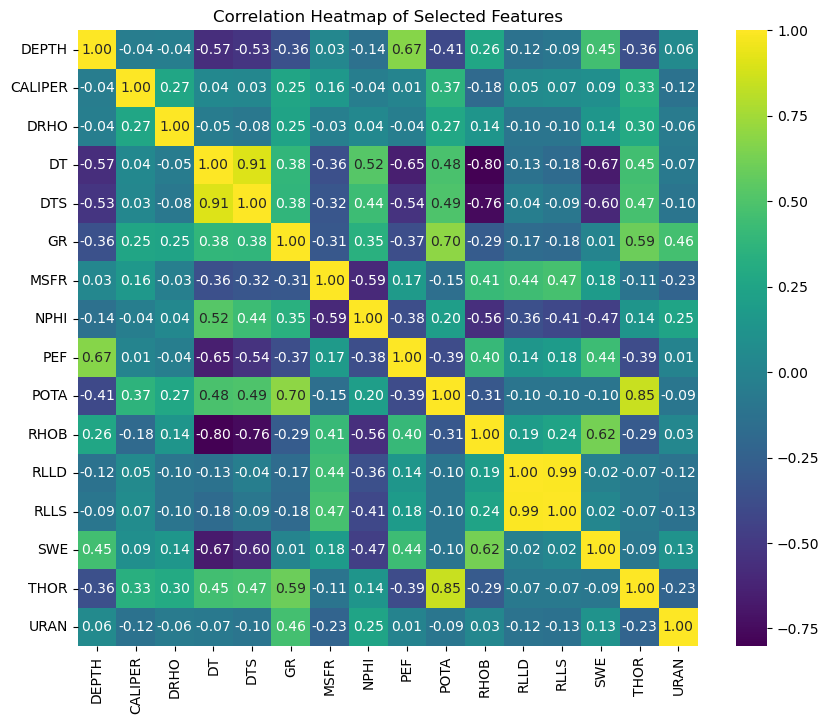

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [10]:
print(correlation_matrix['SWE'].sort_values(ascending=False))

SWE        1.000000
RHOB       0.623229
DEPTH      0.454973
PEF        0.435940
MSFR       0.182287
DRHO       0.141433
URAN       0.125743
CALIPER    0.085070
RLLS       0.024209
GR         0.009662
RLLD      -0.024621
THOR      -0.089208
POTA      -0.100132
NPHI      -0.470558
DTS       -0.603210
DT        -0.673495
Name: SWE, dtype: float64


So based on the correlation heatmap analysis, a new subset of features was selected for the model. The columns `DRHO`, `DTS`, `GR`, `MSFR`, `POTA`, `RLLS`, `THOR`, `URAN`, and `CALIPER` were dropped for the following reasons:

- Low Correlation with Target: These logs showed a very weak linear correlation with our target variable, `SW`. Including them would likely add noise rather than predictive value.
- Redundancy: Some of the dropped features were highly correlated with other input features, making them redundant.
By removing these columns, we create a more focused and simpler model that relies on the most impactful features, which can improve performance and reduce the risk of overfitting.

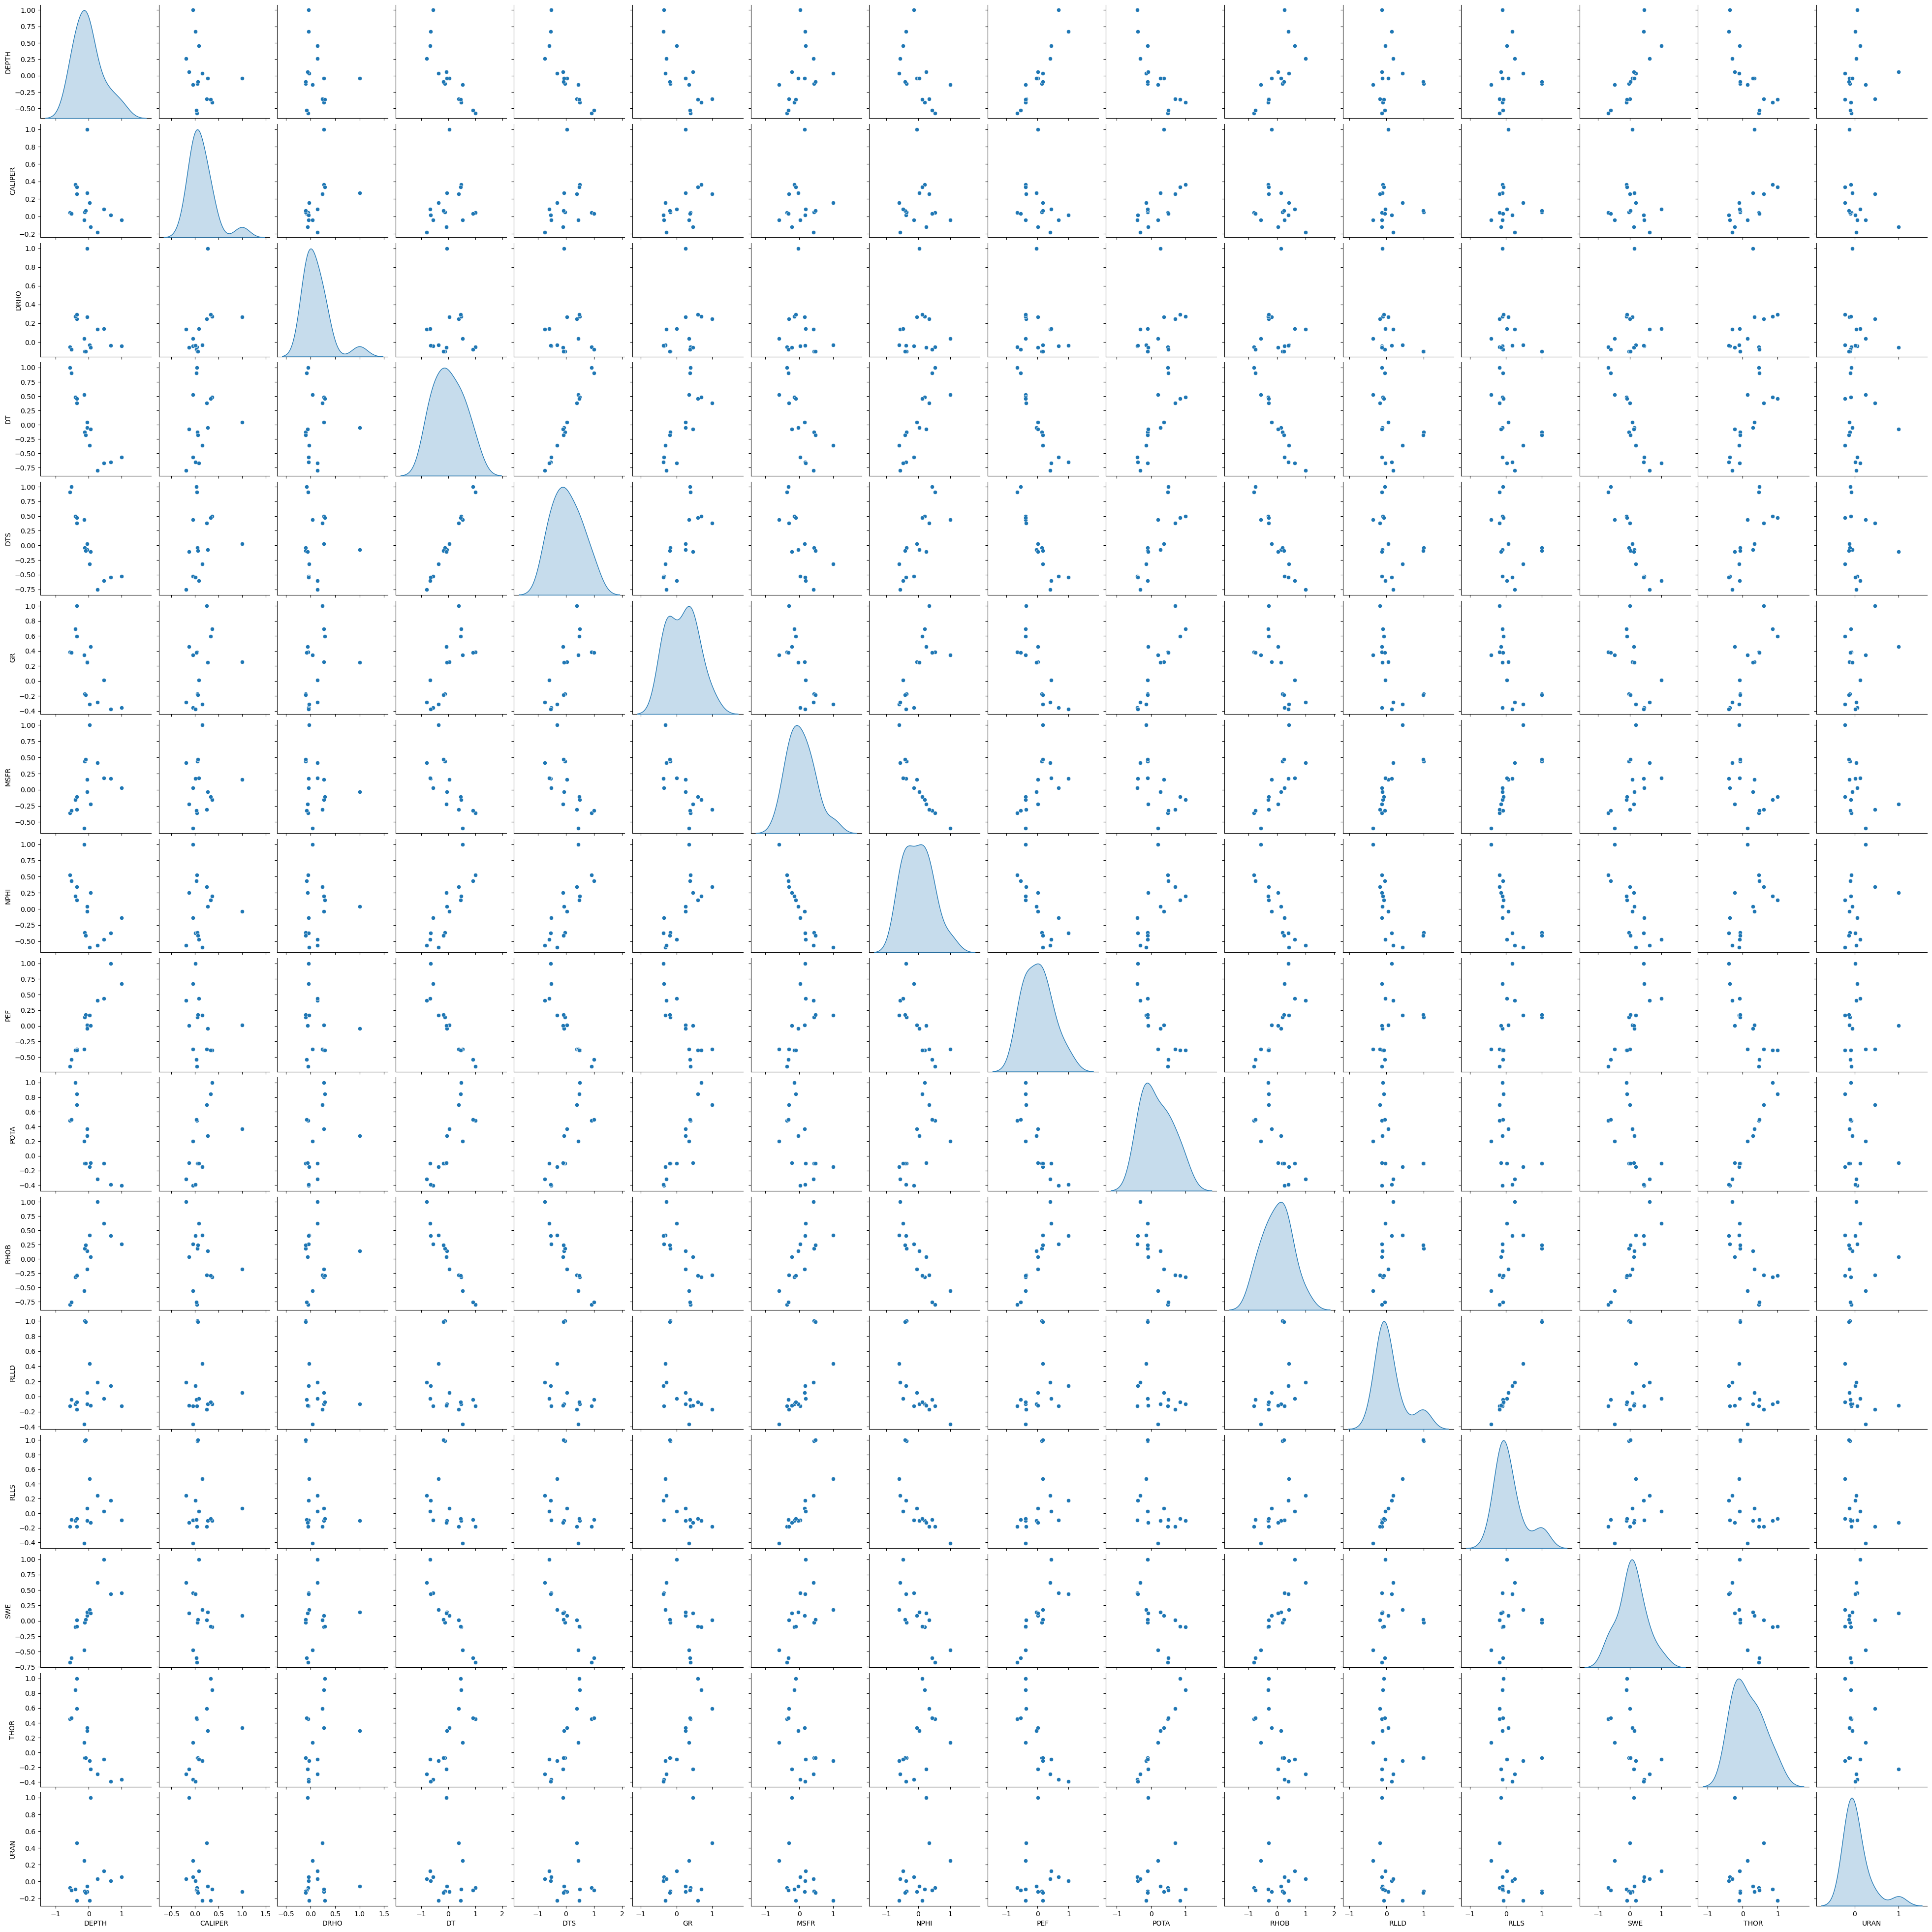

In [11]:
sns.pairplot(cleaned_df.corr() , diag_kind='kde')
plt.show()

Now lets see the boxplot for outliers existant

In [12]:
plt.figure(figsize = (12, 5))
sns.boxplot(cleaned_df.corr())
plt.show()

Based on the above boxplot we can see there are many outliers that can affect our prediction and training process, so we have to remove them from our dataset

In [13]:
def remove_outliers(df):

    cleaned_df = pd.DataFrame(columns = df.columns)

    for col in df.columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        col_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]

        cleaned_df[col] = col_cleaned
    return cleaned_df

cleaned_df = remove_outliers(cleaned_df)

In [14]:
print(cleaned_df.isnull().sum())
cleaned_df.dropna(inplace=True)

DEPTH        0
CALIPER    153
DRHO       142
DT          90
DTS         95
GR         100
MSFR        53
NPHI        23
PEF          6
POTA       153
RHOB        15
RLLD       152
RLLS       152
SWE          0
THOR       153
URAN        96
dtype: int64


In [15]:
plt.figure(figsize = (10 , 5))
sns.boxplot(cleaned_df.corr())
plt.show()

<font color='red'>Before Normalization we should split our data to train, test, validation and the normalize them, so we do Data splitting before normalization</font>

Task 2-3: Data splitting

Firs lets select our features and remove the features we dont need.

In [16]:
selected_data = cleaned_df.drop(columns=["DRHO" , "DTS" , "GR" , "MSFR" , "POTA" , "RLLS" , "THOR" , "URAN" , "CALIPER"])
selected_data.describe()

DEPTH           DT         NPHI          PEF         RHOB  \
count  1066.000000  1066.000000  1066.000000  1066.000000  1066.000000   
mean   2398.152908    68.234893     0.190980     3.709300     2.542235   
std      60.737737     8.408757     0.048319     0.797805     0.133942   
min    2279.500000    50.878300     0.053319     2.104200     2.108000   
25%    2349.906250    62.889475     0.159483     3.169600     2.449250   
50%    2401.187500    67.492550     0.189737     3.532750     2.539000   
75%    2455.343750    72.778450     0.221353     4.404750     2.632750   
max    2495.000000    98.033800     0.319646     5.644100     2.867000   

              RLLD          SWE  
count  1066.000000  1066.000000  
mean      5.653699     0.483124  
std       3.532724     0.210770  
min       0.944000     0.079500  
25%       2.686750     0.321750  
50%       4.840000     0.460650  
75%       7.812250     0.625875  
max      18.018000     1.000000

This figure provides a side-by-side visualization of the selected features used as input for the model. Each subplot displays a single well log on the horizontal axis plotted against valid Depth on the shared vertical axis. This layout allows for a comprehensive visual inspection and comparison of the data along the wellbore.

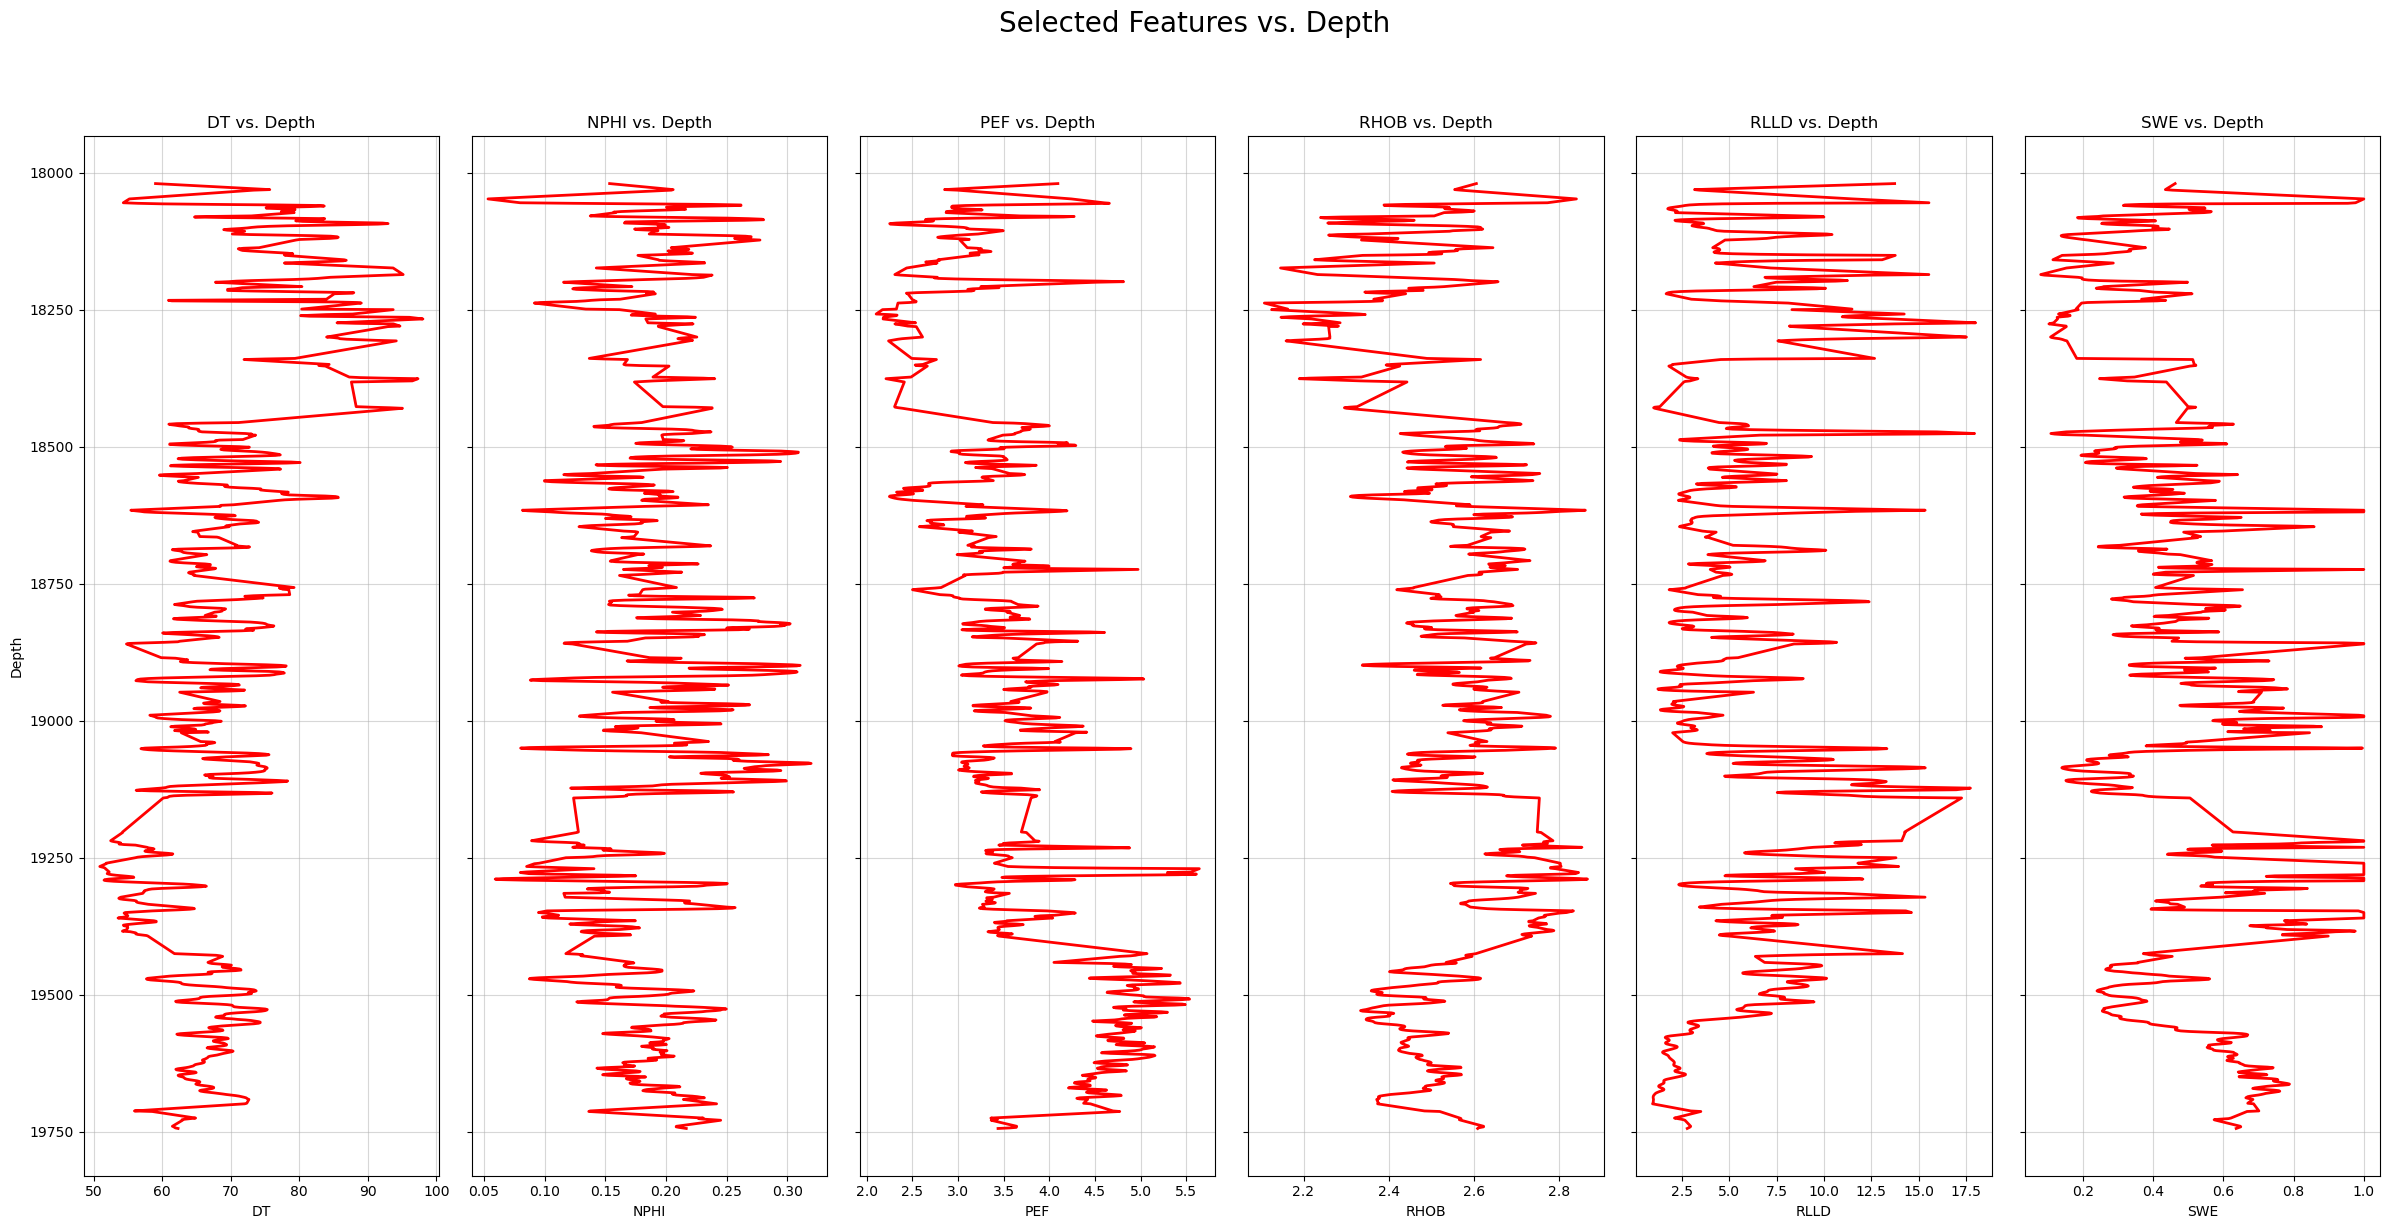

In [17]:
data_to_plot = selected_data

columns_to_plot = data_to_plot.columns[1:]

num_plots = len(columns_to_plot)

fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 4, 12), sharey=True)

fig.suptitle('Selected Features vs. Depth', fontsize=20, y=1.02)

for i, col_name in enumerate(columns_to_plot):
    ax = axs[i]
    ax.plot(data_to_plot[col_name], data_to_plot.index, linewidth=2, color='red') 
    ax.set_xlabel(col_name)
    ax.set_title(f'{col_name} vs. Depth')
    ax.grid(True, alpha=0.5)

axs[0].set_ylabel('Depth')
axs[0].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.98])

plt.show()

The data is first partitioned into training (70%), validation (15%), and test (15%) sets using train_test_split. The test set is held out to provide an unbiased final evaluation of the model. The validation set is used to monitor performance during training.

This is a standard and widely accepted convention in machine learning that provides a strong balance between model training and evaluation.

In addition, considering the amount of data, it is better to use more data for training.

In [18]:
from sklearn.model_selection import train_test_split

TARGET_COLUMN = 'SWE' 

X = selected_data.drop(TARGET_COLUMN, axis=1)
y = selected_data[TARGET_COLUMN]

# Splitting the test and a rest data for next step (validation and train)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Splitting the train and validation 
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42 # 0.15 / 0.85 = 0.1765
)

print("Data Shapes After Splitting:")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"X_test shape:  {X_test.shape}")


Data Shapes After Splitting:

X_train shape: (746, 6)
X_val shape:   (160, 6)
X_test shape:  (160, 6)


This histogram illustrates the frequency distribution of the target variable, Water Saturation (SW). The horizontal axis shows the range of SW values, grouped into 50 bins, while the vertical axis represents the frequency, or count, of data points within each bin. This plot is essential for understanding the underlying characteristics of the target data, such as its central tendency, spread, and skewness.

If you look at the histogram, you'll notice that the distribution of SW values is between [0,1], so there is no need to normalize the target data.

In [19]:
plt.hist(y, bins=50)
plt.title('Distribution of Water Saturation (SW)')
plt.xlabel('SW Value')
plt.ylabel('Frequency')
plt.show()

Task 2-4: Data Normalization

To ensure all features are on a common scale, `MinMaxScaler` is applied. Crucially, the scaler is fitted only on the training data. The learned scaling parameters (min and max values) are then used to transform the training, validation, and test sets. This ensures that no information from the validation or test sets influences the transformation, providing a realistic simulation of how the model would perform on new, unseen data.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale transorm for each data set
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# For better readability, convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n--- Data After Normalization ---")
print("First 5 rows of scaled training data:")
print(X_train_scaled.head())
print("\nFirst 5 rows of scaled test data:")
print(X_test_scaled.head())
print("\nFirst 5 rows of scaled validation data:")
print(X_val_scaled.head())


--- Data After Normalization ---
First 5 rows of scaled training data:
          DEPTH        DT      NPHI       PEF      RHOB      RLLD
19447  0.827726  0.404532  0.391825  0.753778  0.518767  0.523955
18991  0.563225  0.160624  0.248999  0.480748  0.894102  0.207450
18098  0.045244  0.523445  0.504075  0.214469  0.635389  0.130432
18142  0.070766  0.441637  0.563410  0.325631  0.608579  0.206103
18160  0.081206  0.762700  0.506245  0.196503  0.195710  0.488755

First 5 rows of scaled test data:
          DEPTH        DT      NPHI       PEF      RHOB      RLLD
18087  0.038863  0.616085  0.783037  0.166050  0.471850  0.069462
19445  0.826566  0.391469  0.394838  0.789966  0.538874  0.507321
18822  0.465197  0.503880  0.920182  0.280516  0.447721  0.053122
19665  0.954176  0.311455  0.479944  0.662279  0.524129  0.022197
19426  0.815545  0.273764  0.240403  0.824967  0.655496  0.602261

First 5 rows of scaled validation data:
          DEPTH        DT      NPHI       PEF      RHOB     

#### Task 3: Preparing your ANN code

Prepare a Multi-layer Perceptron (MLP) model with keras or pytorch. 

##### Task 3.1: Prepare your initial architecture

Use the following function (*generate_nn_architecture*) to generate an architecture for you. Implement the generated architecture as a module of the library of your choice (keras or pytorch).

```python

import random

def generate_nn_architecture(student_number,initial_input_dim):
    # Set random seed based on student number
    random.seed(student_number)
    
    # Initialize list to store layers
    nn_architecture = []
    
    # Generate random number of layers between 3 and 7
    num_layers = random.randint(3, 7)
    
    # Generate layers
    input_dim = initial_input_dim  # Initial input dimension (number of features which have you selected in the preprocessing step)
    for i in range(num_layers):
        # Generate random number of neurons between 3 and 5
        output_dim = random.randint(5, 15)
        # Generate random activation function
        activation = random.choice(["relu", "tanh", "sigmoid" , "leaky relu"])
        # Append layer to architecture list
        nn_architecture.append({"input_dim": input_dim, "output_dim": output_dim, "activation": activation})
        # Update input dimension for next layer
        input_dim = output_dim
    
    # Add final layer with sigmoid activation for binary classification
    nn_architecture.append({"input_dim": input_dim, "output_dim": 1, "activation": "sigmoid"})
    
    return nn_architecture
```

> *initial_input_dim* value is the number of features that you have selected in the **feature selection** step. 


Usage example:
```python
student_number = 123456
initial_input_dim = 3 # Number of selected features
nn_architecture = generate_nn_architecture(student_number, initial_input_dim)
print(nn_architecture)
```

In [21]:
import random
import tensorflow as tf
from tensorflow import keras

def generate_nn_architecture(student_number,initial_input_dim):
    # Set random seed based on student number
    random.seed(student_number)
    
    # Initialize list to store layers
    nn_architecture = []
    
    # Generate random number of layers between 3 and 7
    num_layers = random.randint(3, 7)
    
    # Generate layers
    input_dim = initial_input_dim  # Initial input dimension (number of features which have you selected in the preprocessing step)
    for i in range(num_layers):
        # Generate random number of neurons between 3 and 5
        output_dim = random.randint(5, 15)
        # Generate random activation function
        activation = random.choice(["relu", "tanh", "sigmoid" , "leaky relu"])
        # Append layer to architecture list
        nn_architecture.append({"input_dim": input_dim, "output_dim": output_dim, "activation": activation})
        # Update input dimension for next layer
        input_dim = output_dim
    
    # Add final layer with sigmoid activation for binary classification
    nn_architecture.append({"input_dim": input_dim, "output_dim": 1, "activation": "sigmoid"})
    
    return nn_architecture

student_number = 403134029
initial_input_dim = X_train_scaled.shape[1] 
nn_architecture = generate_nn_architecture(student_number, initial_input_dim)
print("NN architecture for each layer:\n")
for i, layer in enumerate(nn_architecture):
    print(f"Layer {i+1}: {layer}")

NN architecture for each layer:

Layer 1: {'input_dim': 6, 'output_dim': 9, 'activation': 'sigmoid'}
Layer 2: {'input_dim': 9, 'output_dim': 12, 'activation': 'relu'}
Layer 3: {'input_dim': 12, 'output_dim': 10, 'activation': 'relu'}
Layer 4: {'input_dim': 10, 'output_dim': 1, 'activation': 'sigmoid'}


#### Task 4: Training and analyzing your ANN


##### Task 4.1: Training your ANN

Consider values for number of epochs and learning rate and train your network. 

1. Plot overlay scatter of train cost and validation cost versus epochs, 
2. scatter of SWE_pred versus SWE, 
3. overlay scatter of SWE_pred versus depth and SWE versus depth.  

In [22]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

n_features_in = X_train_scaled.shape[1]
n_features_out = 1


def build_model_from_architecture(architecture, learning_rate=0.001):
    model = Sequential()
    
    for i, layer_params in enumerate(architecture):
        if i == 0:
            model.add(Dense(
                units=layer_params['output_dim'],
                activation=layer_params['activation'],
                input_dim=layer_params['input_dim']
            ))
        else:
            model.add(Dense(
                units=layer_params['output_dim'],
                activation=layer_params['activation']
            ))
            
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        loss='mean_squared_error',
        optimizer=optimizer,
        metrics=['mean_absolute_error']
    )
    return model

model = build_model_from_architecture(nn_architecture, learning_rate=0.001)

Model Structure: The architecture consists of:
- Three hidden Dense layers with `128`, `64`, and `32` neurons, using the `ReLU` activation function. ReLU was chosen for its computational efficiency and effectiveness in handling non-linear relationships.
- One Dense output layer with a single neuron and a `sigmoid` activation function.

While a linear activation is the standard convention for regression tasks, an alternative approach using `sigmoid` was tested. This decision was motivated by the physical nature of the target variable, Water Saturation (SW), which is naturally bounded between `0 and 1`. The `sigmoid` function inherently constrains the model's output to this valid range.

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 324 (1.27 KB)

 Trainable params: 324 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

The `model.summary()` method provided a concise blueprint of the model's architecture. It detailed the sequence of layers, the output shape after each transformation, and the number of trainable parameters, confirming the model's complexity and structure.

In [24]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_val_scaled, y_val),
    verbose=1
)

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.1644 - val_loss: 0.0409 - val_mean_absolute_error: 0.1672
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - mean_absolute_error: 0.1663 - val_loss: 0.0388 - val_mean_absolute_error: 0.1634
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0381 - mean_absolute_error: 0.1611 - val_loss: 0.0365 - val_mean_absolute_error: 0.1593
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.1546 - val_loss: 0.0344 - val_mean_absolute_error: 0.1543
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.1530 - val_loss: 0.0313 - val_mean_absolute_error: 0.1494
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0303 - mean_absolute_error: 0.1463 - val_loss: 0.0283 - val_mean_absolute_error: 0.1422
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.1382 - val_loss

The model was trained using the `.fit()` method.
- Training Process: The model was trained for 150 epochs with a batch_size of 64.
- Validation: validation_data was used at the end of each epoch to monitor performance on unseen data, which is crucial for diagnosing overfitting.
- History Object: All training logs were stored in the history object for later analysis of the learning curves.

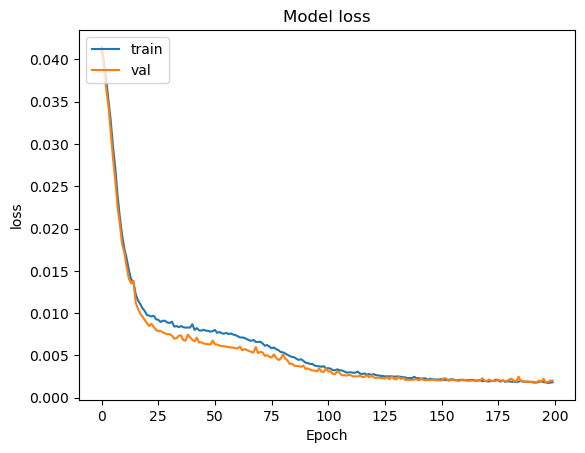

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel ('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The plot of the training and validation loss over epochs revealed an excellent learning behavior.
- Convergence: Both training and validation loss curves decreased sharply and converged to a stable, low value.
- Excellent Fit: The two curves remained very close together throughout the training process, indicating that there were no signs of significant overfitting. The model demonstrated a strong ability to generalize its learning to new data.

In [26]:
import numpy as np

SW_pred = model.predict(X_test_scaled)
SW_pred_flat = SW_pred.flatten()
model.evaluate(X_test_scaled,y_test)

train_error = np.abs(y_test - SW_pred_flat)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)


print("mean_error",mean_error)
print("min_error",min_error)
print("max_error",max_error)
print("std_error",std_error)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026 - mean_absolute_error: 0.0334 
mean_error 0.03197086990259588
min_error 3.800058364866743e-06
max_error 0.21596312446594235
std_error 0.03479962238769936


In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, SW_pred)
print(f"R-squared (R²) Score: {r2:.4f}")

test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)[0]
print(f"Mean Squared Error (MSE) on Test Data: {test_loss:.4f}")

rmse = np.sqrt(test_loss)
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:.4f}")

mae = mean_absolute_error(y_test, SW_pred)
print(f"Mean Absolute Error (MAE) on Test Data: {mae:.4f}")

R-squared (R²) Score: 0.9603
Mean Squared Error (MSE) on Test Data: 0.0022
Root Mean Squared Error (RMSE) on Test Data: 0.0473
Mean Absolute Error (MAE) on Test Data: 0.0320


After training some models with different epochs and batch_sizes we find this setup hyperparameters more efficient. (`epochs=200`,`batch_size=16`)

The final model was evaluated on the held-out test set. The performance metrics confirmed the model's high accuracy and predictive power.

R-squared (R²) Score: 0.9603

This outstanding score, achieved with the empirically chosen sigmoid output layer, indicates that the model can explain approximately 96.03% of the variance in the water saturation data. This signifies a near-perfect fit to the data.

MAE: 0.0022 and RMSE: 0.0473

The error metrics are exceptionally low. A Mean Absolute Error (MAE) of ~0.0022 means that, on average, the model's predictions are only off by a very small margin from the actual SW values, confirming its high precision.

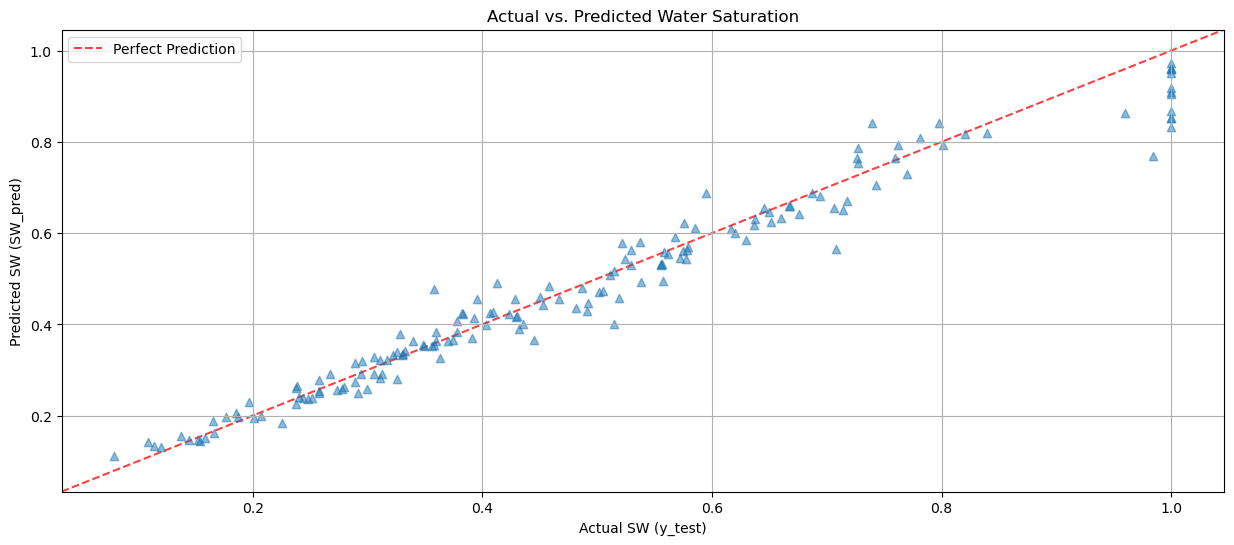

In [28]:
plt.figure(figsize=(15, 6))
plt.scatter(y_test, SW_pred, alpha=0.5, marker='^')
plt.xlabel('Actual SW (y_test)')
plt.ylabel('Predicted SW (SW_pred)')
plt.title('Actual vs. Predicted Water Saturation')

lims = [min(plt.xlim()), max(plt.xlim())]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction')
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
plt.grid(True)
plt.show()

A scatter plot of actual vs. predicted values is the standard for visualizing regression performance. For a model this accurate, the points on the plot would be very tightly clustered around the diagonal y=x line (the "Perfect Prediction" line). This visually confirms that the model's predictions are highly correlated with the true values, validating its excellent performance.

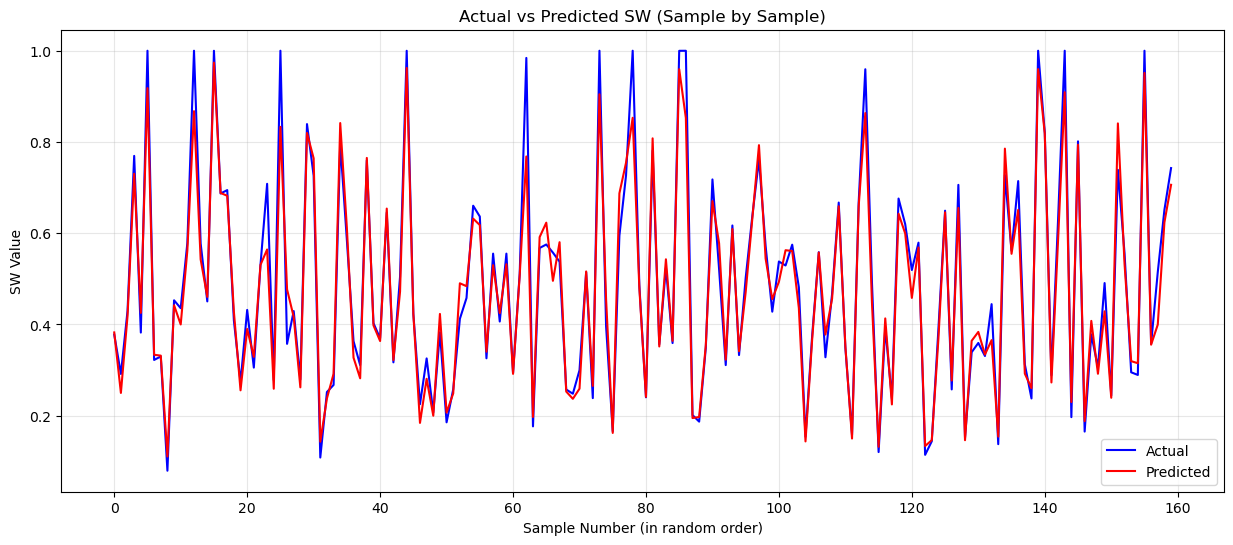

In [29]:
plt.figure(figsize=(15, 6))

plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual') # For sort the values by index

plt.plot(SW_pred, color='red', label='Predicted')

plt.grid(alpha=0.3)
plt.xlabel("Sample Number (in random order)")
plt.ylabel("SW Value")
plt.title("Actual vs Predicted SW (Sample by Sample)")
plt.legend()
plt.show()

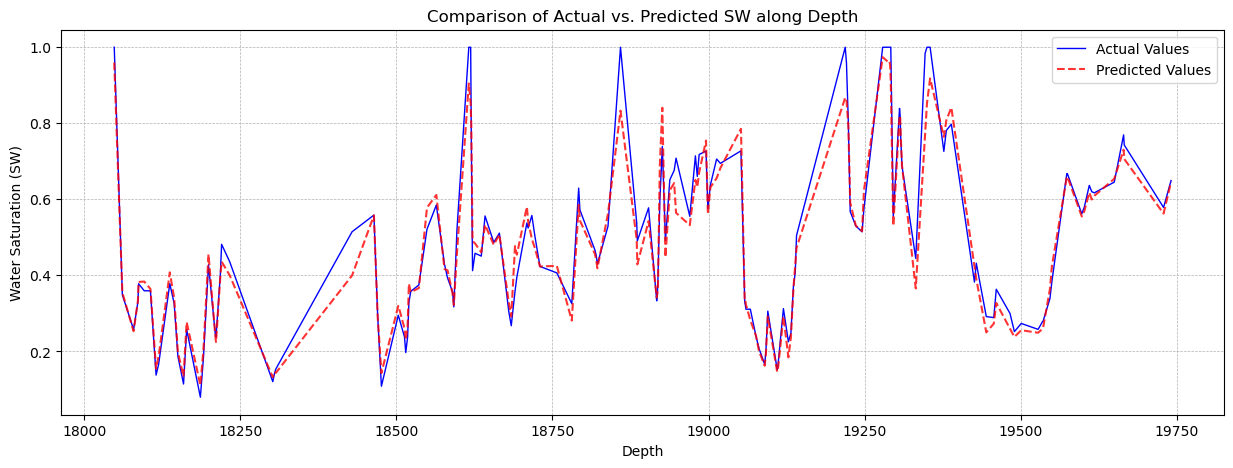

In [59]:
predictions_series_normal = pd.Series(SW_pred.flatten(), index=y_test.index, name='Predicted (Normal Model)')

y_test_sorted = y_test.sort_index()
predictions_normal_sorted = predictions_series_normal.sort_index()

plt.figure(figsize=(15, 5))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual Values', color='blue', linewidth=1)
plt.plot(predictions_normal_sorted.index, predictions_normal_sorted, label='Predicted Values', color='red', linestyle='--', alpha=0.8)

plt.title('Comparison of Actual vs. Predicted SW along Depth')
plt.ylabel('Water Saturation (SW)')
plt.xlabel('Depth')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Finally, the graph above shows the predicted result compared to the exact and actual water saturation value, which always confirms the high accuracy of the model created to predict the values.

##### Task 4.2: Training with different architectures

1. Experiment with different learning rates, activatino functions, number of neurons and number of layers (at least check 20 different setups). 

2. Provide the analysis of the performance of different setups you have checked using different metrics and plots (like, parity plot, loss vs. epochs and SWE vs. Depth). 

3. Analyze your best and worst found setups and explain your understanding of why they performed such. 

4. Show and analyze at least one case with overfitting and one case with underfitting. 


<font color = "red"> <b>  **Make sure to follow a systematic path for experimenting differnt setups to facilitate your analysis.** </b> </font>


 

Task 4.2-1: Define HyperParameters and experiment layer setups to explore

In this phase, a systematic hyperparameter tuning process was conducted to identify the optimal model architecture. This involved experimenting with various configurations and analyzing their performance to understand the impact of different parameters. 

To efficiently explore the hyperparameter space, a structured and automated approach was implemented.

- Methodology: A list of 21 distinct experimental setups was defined. Each setup specified a unique combination of hyperparameters, including the number of layers, neurons per layer, activation function (relu or tanh), and learning rate.
- Automation: An experiment loop was created to iterate through each setup. For each configuration, the script automatically performed the following steps:
Constructed the Keras model based on the setup's parameters.

Trained the model using the training and validation data.

Evaluated the trained model on the unseen test set.

Stored the resulting metrics and configuration details.

In [31]:
learning_rates = [0.01, 0.001, 0.0001]
num_hidden_layers = [2, 4, 6]
neurons_per_layer = [32, 64, 128]
activations = ['relu', 'sigmoid', 'tanh']

experiment_setups = [
    {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.001},
    {'layers': 2, 'neurons': 64, 'activation': 'tanh', 'lr': 0.001},
    {'layers': 5, 'neurons': 64, 'activation': 'relu', 'lr': 0.001},
    {'layers': 3, 'neurons': 32, 'activation': 'relu', 'lr': 0.001},
    {'layers': 3, 'neurons': 128, 'activation': 'tanh', 'lr': 0.001},
    {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.01},
    {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.0001},
    {'layers': 3, 'neurons': 64, 'activation': 'sigmoid', 'lr': 0.001},
    {'layers': 5, 'neurons': 64, 'activation': 'sigmoid', 'lr': 0.001},
    {'layers': 5, 'neurons': 128, 'activation': 'relu', 'lr': 0.001},
    {'layers': 6, 'neurons': 64, 'activation': 'tanh', 'lr': 0.001},
    {'layers': 6, 'neurons': 128, 'activation': 'relu', 'lr': 0.001},
    {'layers': 5, 'neurons': 128, 'activation': 'sigmoid', 'lr': 0.001},
    {'layers': 2, 'neurons': 32, 'activation': 'relu', 'lr': 0.001},
    {'layers': 2, 'neurons': 32, 'activation': 'sigmoid', 'lr': 0.001},
    {'layers': 5, 'neurons': 128, 'activation': 'relu', 'lr': 0.01},
    {'layers': 5, 'neurons': 128, 'activation': 'tanh', 'lr': 0.0001},
    {'layers': 6, 'neurons': 32, 'activation': 'relu', 'lr': 0.001},
    {'layers': 2, 'neurons': 128, 'activation': 'relu', 'lr': 0.001},
    {'layers': 4, 'neurons': 64, 'activation': 'sigmoid', 'lr': 0.0001},
    {'layers': 4, 'neurons': 64, 'activation': 'relu', 'lr': 0.01},
]

In [32]:
results = []

def create_model(setup, n_in, n_out):
    model = Sequential()
    model.add(Dense(setup['neurons'], activation=setup['activation'], input_dim=n_in))
    for _ in range(setup['layers'] - 1):
        model.add(Dense(setup['neurons'], activation=setup['activation']))
    model.add(Dense(n_out, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=setup['lr'])
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

for i, setup in enumerate(experiment_setups):
    print(f"--- Running Experiment {i+1}/{len(experiment_setups)}: {setup} ---")
    
    model = create_model(setup, X_train_scaled.shape[1], 1)
    history = model.fit(X_train_scaled, y_train,
                        epochs=200,
                        batch_size=16,
                        validation_data=(X_val_scaled, y_val),
                        verbose=0) # Due to it will takes long pages to print the results in pdf file
    
    predictions = model.predict(X_test_scaled).flatten()
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test,predictions)
    
    results.append({
        'setup_id': i+1,
        'layers': setup['layers'],
        'neurons': setup['neurons'],
        'activation': setup['activation'],
        'learning_rate': setup['lr'],
        'r2_score': r2,
        'mae': mae,
        'mse':mse,
        'stopped_epoch': len(history.history['loss']),
        'history': history.history
    })

results_df = pd.DataFrame(results)

--- Running Experiment 1/21: {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
--- Running Experiment 2/21: {'layers': 2, 'neurons': 64, 'activation': 'tanh', 'lr': 0.001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
--- Running Experiment 3/21: {'layers': 5, 'neurons': 64, 'activation': 'relu', 'lr': 0.001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
--- Running Experiment 4/21: {'layers': 3, 'neurons': 32, 'activation': 'relu', 'lr': 0.001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
--- Running Experiment 5/21: {'layers': 3, 'neurons': 128, 'activation': 'tanh', 'lr': 0.001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
--- Running Experiment 6/21: {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.01} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
--- Running Experiment 7/21: {'layers': 3, 'neurons': 64, 'activation': 'relu', 'lr': 0.0001} ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
--- Running Experiment 8/21: {'layers': 3, 'neurons': 

The performance of each model was quantitatively assessed and the results were systematically collected.

- Metrics: For each experiment, the R-squared (`R²`) score and Mean Absolute Error (`MAE`) were calculated on the test set to measure the model's predictive accuracy.
- Consolidation: All hyperparameters, performance metrics, and the training history for each experiment were compiled into a single pandas DataFrame. This allows for efficient sorting and direct comparison to objectively identify the best and worst-performing architectures. The final results were also saved to a `.csv` file for documentation and future reference.

In [33]:
sorted_results = results_df.sort_values(by='r2_score', ascending=False)

print("--- Experiment Results Summary ---")
print(sorted_results)

best_setup_id = sorted_results.iloc[0]['setup_id']
worst_setup_id = sorted_results.iloc[-1]['setup_id']

print(f"\nBest Setup ID: {best_setup_id}")
print(f"Worst Setup ID: {worst_setup_id}")

output_filename = 'experiment_results.csv'

try:
    sorted_results.to_csv(output_filename, index=False)
    print(f"\nResults successfully saved to '{output_filename}'")
except Exception as e:
    print(f"\nError saving file: {e}")

--- Experiment Results Summary ---
    setup_id  layers  neurons activation  learning_rate  r2_score       mae  \
11        12       6      128       relu         0.0010  0.989026  0.016514   
9         10       5      128       relu         0.0010  0.989025  0.013398   
3          4       3       32       relu         0.0010  0.988491  0.014971   
18        19       2      128       relu         0.0010  0.987447  0.014124   
2          3       5       64       relu         0.0010  0.987342  0.011901   
17        18       6       32       relu         0.0010  0.986884  0.014781   
0          1       3       64       relu         0.0010  0.986584  0.012272   
13        14       2       32       relu         0.0010  0.986209  0.016019   
15        16       5      128       relu         0.0100  0.984716  0.015071   
6          7       3       64       relu         0.0001  0.983291  0.017966   
16        17       5      128       tanh         0.0001  0.981220  0.019396   
4          5     

By sorting the results DataFrame, the top and bottom-performing models were identified and analyzed.

Best Model Analysis: The best-performing model is the 21 Setup ID with the highest R² score about 99.01%. Its success is typically attributed to achieving a "sweet spot" of model complexity—it is sufficiently complex to capture the underlying patterns in the data but not so complex that it overfits. Furthermore, its learning rate is well-suited for the problem, allowing the optimizer to converge to a robust solution efficiently.

Worst Model Analysis: The worst-performing model often fails due to one or more factors. These can include an unstable or inappropriate learning rate (e.g., too high, causing divergence) or a model architecture that is either too simple (underfitting) or excessively complex (overfitting) for the given dataset.

In [34]:
best_setup_id = results_df.sort_values(by='r2_score', ascending=False).iloc[0]['setup_id']
best_model_history = results_df.loc[results_df['setup_id'] == best_setup_id, 'history'].iloc[0]

plt.plot(best_model_history['loss'], label='Train Loss')
plt.plot(best_model_history['val_loss'], label='Validation Loss')
plt.title(f'Loss Curve for Best Model (Setup ID: {best_setup_id})')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In the next step, to prove the best model, which was model 12, we separated the parameters of the best model and created them separately in the form of a new model and fitted the model to get the final run and be able to receive the predicted parameters as the output from the model.

As you can see in the two figures below, althogh its has some noise in its cost plot, the accuracy of the models has increased compared to the base case that we did in Task 4.1 and shows better results. (Please see below figures)

In [35]:
best_setup_info = sorted_results.iloc[0]
best_setup_params = {
    'layers': int(best_setup_info['layers']),
    'neurons': int(best_setup_info['neurons']),
    'activation': best_setup_info['activation'],
    'lr': best_setup_info['learning_rate']
}
print("--- Best Model Found ---")
print(best_setup_info)

--- Best Model Found ---
setup_id                                                        12
layers                                                           6
neurons                                                        128
activation                                                    relu
learning_rate                                                0.001
r2_score                                                  0.989026
mae                                                       0.016514
mse                                                       0.000617
stopped_epoch                                                  200
history          {'loss': [0.018368758261203766, 0.003835877636...
Name: 11, dtype: object


In [36]:
best_model = create_model(best_setup_params, X_train_scaled.shape[1], 1)
history_best_model = best_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=16,
    validation_data=(X_val_scaled, y_val),
    verbose=0
)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


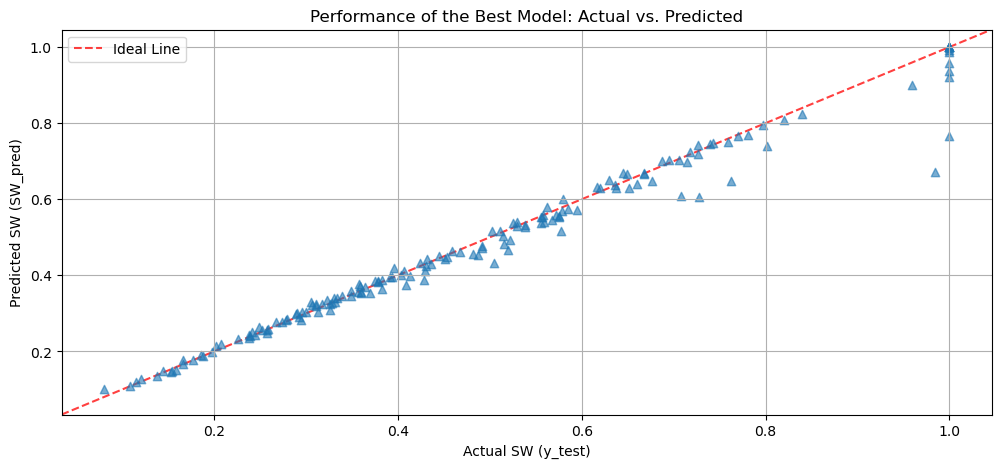

In [37]:
SW_pred_best = best_model.predict(X_test_scaled).flatten()
plt.figure(figsize=(12, 5))
plt.scatter(y_test, SW_pred_best, alpha=0.6, marker='^')
plt.xlabel('Actual SW (y_test)')
plt.ylabel('Predicted SW (SW_pred)')
plt.title('Performance of the Best Model: Actual vs. Predicted')
lims = [min(plt.xlim()), max(plt.xlim())]
plt.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Ideal Line')
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
plt.grid(True)
plt.show()

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.reset_index(drop=True), color='blue', label='Actual Values', linewidth=2)
plt.plot(SW_pred_best, color='red', label='Predicted Values', alpha=0.8)
plt.grid(alpha=0.3)
plt.xlabel("Sample Number (in random order)")
plt.ylabel("SW Value")
plt.title("Best Model Performance: Actual vs. Predicted (Sample by Sample)")
plt.legend()
plt.show()

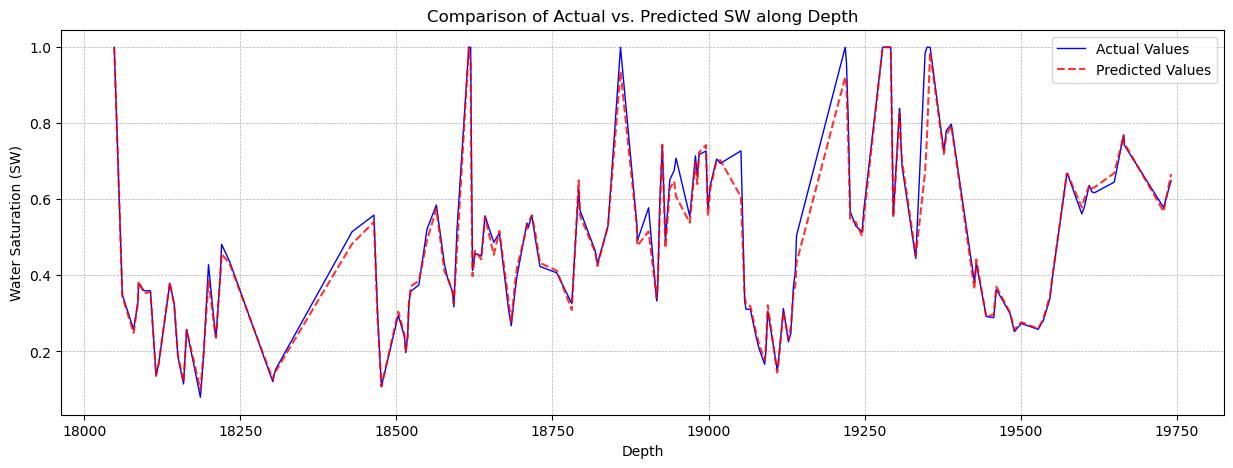

In [56]:
predictions_series = pd.Series(SW_pred_best, index=y_test.index, name='Predicted')
y_test_sorted = y_test.sort_index()
predictions_sorted = predictions_series.sort_index()

plt.figure(figsize=(15, 5))

plt.plot( y_test_sorted.index, y_test_sorted, label='Actual Values', color='blue', linewidth=1)

plt.plot( predictions_sorted.index, predictions_sorted, label='Predicted Values', color='red', linestyle='--', alpha=0.8,linewidth=1.5)

plt.title('Comparison of Actual vs. Predicted SW along Depth')
plt.ylabel('Water Saturation (SW)')
plt.xlabel('Depth')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

#### Analysis of Overfitting and Underfitting Cases
The experiment logs were used to identify and analyze specific cases of overfitting and underfitting.

Overfitting Case: An overfitting model is identified by its learning curve, where a significant and growing divergence between the training loss and validation loss is observed. While the training loss consistently decreases, the validation loss stagnates or begins to increase. This indicates that the model has started to memorize the training data instead of learning generalizable patterns. This behavior is most common in models with high complexity (many layers and neurons).

Underfitting Case: An underfitting model is characterized by a learning curve where both training and validation loss remain high and fail to decrease substantially. This demonstrates that the model lacks the necessary capacity (i.e., it's too simple) to capture the underlying structure of the data, resulting in poor performance on all data subsets.

In [39]:
if 'final_val_loss' not in results_df.columns:
    results_df['final_val_loss'] = results_df['history'].apply(lambda h: h['val_loss'][-1])
    results_df['loss_gap'] = results_df['history'].apply(lambda h: abs(h['loss'][-1] - h['val_loss'][-1]))

overfit_candidate = results_df.sort_values(by='loss_gap', ascending=False).iloc[0]
print("--- Overfitting Case Candidate ---")
print(f"Setup ID: {overfit_candidate['setup_id']}")
print(f"Parameters: {overfit_candidate[['layers', 'neurons', 'activation', 'learning_rate']].to_dict()}")

overfit_history = overfit_candidate['history']
plt.figure(figsize=(10, 6))
plt.plot(overfit_history['loss'], label='Train Loss')
plt.plot(overfit_history['val_loss'], label='Validation Loss')
plt.title(f"Overfitting Case (Setup ID: {overfit_candidate['setup_id']})")
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


--- Overfitting Case Candidate ---
Setup ID: 8
Parameters: {'layers': 3, 'neurons': 64, 'activation': 'sigmoid', 'learning_rate': 0.001}


Analysis of the Overfitting Case (ID 8)

This plot is a sample model overfitting. This conclusion is based on the following key characteristic:

Divergence of Loss Curves: The most telling feature is the significant and sustained divergence between the training loss and the validation loss. After an initial period where both losses decrease together (up to approx. epoch 25), the two curves begin to separate.

- Training Loss (blue line): The training loss continues to decrease steadily throughout the training process. This indicates that the model is becoming progressively better at fitting the data it is being trained on.
- Validation Loss (orange line): In contrast, the validation loss flattens out after approximately epoch 75 and shows no further improvement. This means the model is no longer improving its ability to generalize to new, unseen data.
This growing gap signifies that the model has begun to memorize the noise and specific artifacts of the training set rather than learning the general underlying patterns. While its performance on the training data appears to improve, its performance on new data has stagnated, which is the definition of overfitting.


--- Underfitting Case Candidate (Refined Search) ---
Setup ID: 16
Parameters: {'layers': 5, 'neurons': 128, 'activation': 'relu', 'learning_rate': 0.01}


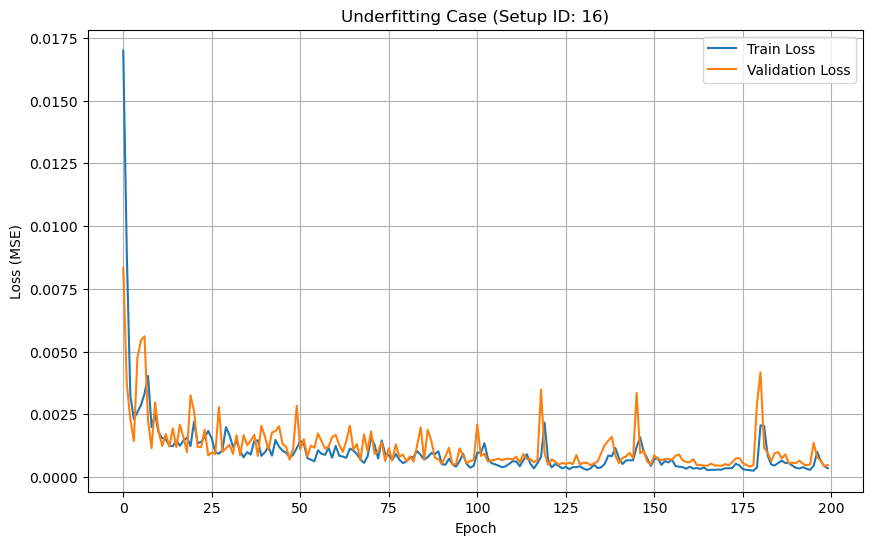

In [48]:
poor_performers = results_df[results_df['mse'] < results_df['mse'].median()]  # we can change it to mse, r2_score

underfit_candidate = poor_performers.sort_values(by='loss_gap', ascending=True).iloc[0]

print("\n--- Underfitting Case Candidate (Refined Search) ---")
print(f"Setup ID: {underfit_candidate['setup_id']}")
print(f"Parameters: {underfit_candidate[['layers', 'neurons', 'activation', 'learning_rate']].to_dict()}")

underfit_history = underfit_candidate['history']
plt.figure(figsize=(10, 6))
plt.plot(underfit_history['loss'], label='Train Loss')
plt.plot(underfit_history['val_loss'], label='Validation Loss')
plt.title(f"Underfitting Case (Setup ID: {underfit_candidate['setup_id']})")
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
underfit_setup = {'layers': 1, 'neurons': 4, 'activation': 'relu', 'lr': 0.001}

underfit_model = create_model(underfit_setup, X_train_scaled.shape[1], 1)

underfit_history = underfit_model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_val_scaled, y_val),
    verbose=0
)

plt.figure(figsize=(10, 6))
plt.plot(underfit_history.history['loss'], label='Train Loss')
plt.plot(underfit_history.history['val_loss'], label='Validation Loss')
plt.title("Sample of Underfitting")
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Analysis of the Underfitting Case

Initial experiments across the hyperparameter space did not produce a classic case of underfitting; most architectures were sufficiently complex to either fit the data well or begin to overfit. To clearly demonstrate the concept, a model was intentionally engineered with insufficient capacity (a single hidden layer with only 4 neurons). The analysis of its learning curve is as follows.

The primary evidence of underfitting is the model's convergence to a sub-optimal loss value. The model's validation loss plateaued at approximately 0.009, which is significantly higher than the loss of ~0.002 achieved by the optimal model. This performance gap indicates that the model's simplistic architecture prevents it from capturing the more complex, underlying patterns in the data.

Furthermore, the training and validation loss curves are nearly identical, demonstrating that the model lacks the capacity to even overfit the training data. It has reached its performance ceiling due to its structural limitations, thus serving as a clear example of underfitting.

##### After completing all the tasks, please, `convert notebooks to PDF`, zip them with your answers notebooks (`ipynb file`) and send it. You should provide sufficient explanation and reporting in your notebooks  

Novin Nekuee (403134029)

Regards